In [33]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import math

In [34]:
# Import Data
patientinfodata_string = 'dev/Data/PatientInfo.csv'
patientinfo_df = pd.read_csv(patientinfodata_string)
patientinfo_df.shape

(2243, 18)

In [35]:
# Retreive exact age for all patients with birth year
new_age = []

current_year = (pd.datetime.now().year)
birth_year = patientinfo_df["birth_year"]

# Remove 's' from end of values in age column
agebin = patientinfo_df["age"].str.split('s').str[0]

for row in birth_year:
    new_age = current_year - patientinfo_df["birth_year"]

patientinfo_df["new age"] = new_age

patientinfo_df

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,56.0
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,33.0
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,56.0
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,29.0
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,6100000085,NaN,male,1990.0,30s,Korea,Gyeongsangnam-do,Changwon-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN,30.0
2239,7000000001,139.0,male,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,87.0,NaN,2020-02-20,NaN,NaN,isolated,22.0
2240,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released,22.0
2241,7000000003,4345.0,female,1972.0,40s,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released,48.0


In [37]:
# Remove 's' from 'age' column in data
agebin = patientinfo_df["age"].str.split('s').str[0]

# If there are any NaN's in New Age list, bring in the value from agebin
patientinfo_df["new age"] = patientinfo_df["new age"].fillna(agebin)

#patientinfo_df["new age"] = patientinfo_df["new age"].fillna(0)

patientinfo_df[916:925]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new age
916,3001000003,NaN,male,NaN,40s,Korea,Gangwon-do,Gangneung-si,NaN,etc,NaN,NaN,45.0,NaN,2020-03-01,NaN,NaN,isolated,40
917,3001000004,NaN,female,NaN,50s,Korea,Gangwon-do,Gangneung-si,NaN,etc,NaN,NaN,17.0,NaN,2020-03-01,2020-03-09,NaN,released,50
918,3001000005,NaN,male,NaN,20s,Korea,Gangwon-do,Gangneung-si,NaN,Shincheonji Church,NaN,NaN,3.0,NaN,2020-03-01,2020-03-09,NaN,released,20
919,3001000006,NaN,female,NaN,20s,Korea,Gangwon-do,Gangneung-si,NaN,gym facility in Cheonan,NaN,NaN,5.0,NaN,2020-03-08,NaN,NaN,isolated,20
920,3004000001,NaN,NaN,NaN,20s,Korea,Gangwon-do,Samcheok-si,NaN,etc,NaN,NaN,17.0,NaN,2020-02-22,2020-03-04,NaN,released,20
921,3005000001,NaN,female,NaN,NaN,Korea,Gangwon-do,Sokcho-si,NaN,etc,NaN,NaN,5.0,NaN,2020-02-22,2020-03-04,NaN,released,NaN
922,3005000002,NaN,male,NaN,NaN,Korea,Gangwon-do,Sokcho-si,NaN,etc,NaN,NaN,5.0,NaN,2020-02-22,2020-03-04,NaN,released,NaN
923,3009000001,NaN,male,1973.0,40s,Korea,Gangwon-do,Wonju-si,NaN,Shincheonji Church,NaN,NaN,24.0,NaN,2020-02-27,NaN,NaN,isolated,47
924,3009000002,NaN,male,1963.0,50s,Korea,Gangwon-do,Wonju-si,NaN,Shincheonji Church,NaN,NaN,4.0,NaN,2020-02-29,NaN,NaN,isolated,57


In [38]:
#patientinfo_df["contact_number"] = patientinfo_df["contact_number"].astype('int64')
patientinfo_df.dtypes

patient_id              int64
global_num            float64
sex                    object
birth_year            float64
age                    object
country                object
province               object
city                   object
disease                object
infection_case         object
infection_order       float64
infected_by           float64
contact_number        float64
symptom_onset_date     object
confirmed_date         object
released_date          object
deceased_date          object
state                  object
new age                object
dtype: object

In [42]:
# Convert all 0's in Contact_Number to NaN
patientinfo_df["contact_number"].replace(0, np.nan)

# Drop all rows with no Contact_Number value
patientinfo2 = patientinfo_df.dropna(subset=['contact_number', 'new age'])

patientinfo2

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new age
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,56
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,33
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,56
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,29
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,6014000002,NaN,male,1998.0,20s,Korea,Gyeongsangbuk-do,Yeongju-si,NaN,NaN,NaN,NaN,3.0,NaN,2020-02-24,NaN,NaN,isolated,22
2239,7000000001,139.0,male,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,87.0,NaN,2020-02-20,NaN,NaN,isolated,22
2240,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released,22
2241,7000000003,4345.0,female,1972.0,40s,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released,48


In [7]:
# Chart Seaborn Lineplot
# ax = sns.lineplot(x="new age", y="contact_number",markers=True, dashes=False)

In [52]:
#Convert New Age to Integer
patientinfo2["new age"] = patientinfo2["new age"].astype('int64')

C:\Users\Lealo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
def group_age(age):
    if age >= 0:
        if age % 10 != 0:
            lower = int(math.floor(age / 10.0)) * 10
            upper = int(math.ceil(age / 10.0)) * 10 - 1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age + 9) 
            return f"{lower}-{upper}"
    return "Unknown"

patientinfo2["age_range"] = patientinfo2["new age"].apply(group_age)
patientinfo2


C:\Users\Lealo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new age,age_group,age_range
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,56,56,50-59
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,33,33,30-39
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,56,56,50-59
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,...,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,29,29,20-29
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,28,28,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,6014000002,NaN,male,1998.0,20s,Korea,Gyeongsangbuk-do,Yeongju-si,NaN,NaN,...,NaN,3.0,NaN,2020-02-24,NaN,NaN,isolated,22,22,20-29
2239,7000000001,139.0,male,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,...,NaN,87.0,NaN,2020-02-20,NaN,NaN,isolated,22,22,20-29
2240,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,...,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released,22,22,20-29
2241,7000000003,4345.0,female,1972.0,40s,Korea,Jeju-do,etc,NaN,etc,...,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released,48,48,40-49


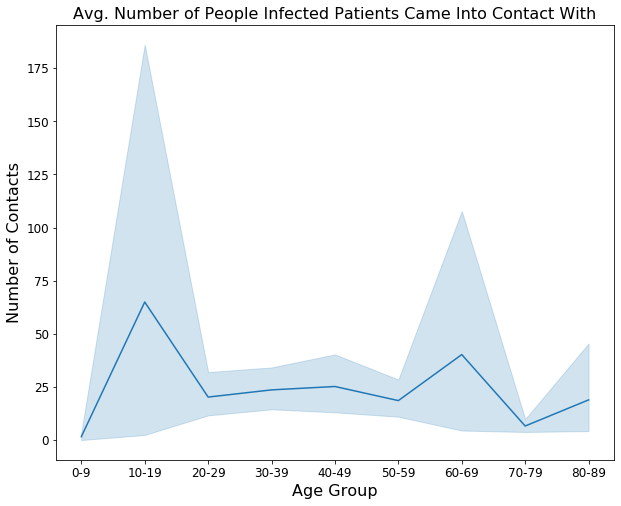

In [72]:
plt.figure(figsize=(10, 8)) 
sns.lineplot(x = patientinfo2["age_range"], y = patientinfo2["contact_number"]) 
plt.title("Avg. Number of People Infected Patients Came Into Contact With", fontsize=16) 
plt.xlabel("Age Group", fontsize=16) 
plt.ylabel("Number of Contacts", fontsize=16) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

In [70]:
#plt.title("Number of People Infected Patients Came Into Contact With")
#plt.xlabel("Age Group")
#plt.ylabel("Number of Contacts")

#x_axis = patientinfo2["age_range"]
#y_axis = patientinfo2["contact_number"]

#plt.xlim(0,120)
#plt.ylim(5,95)

#plt.bar(x_axis, y_axis, marker="o", color="blue")
#plt.show()

In [68]:
patientinfo2["age_range"].count

<bound method Series.count of 0       50-59
1       30-39
2       50-59
3       20-29
4       20-29
        ...  
1897    20-29
2239    20-29
2240    20-29
2241    40-49
2242    40-49
Name: age_range, Length: 406, dtype: object>

In [69]:
patientinfo_df["patient_id"].count

<bound method Series.count of 0       1000000001
1       1000000002
2       1000000003
3       1000000004
4       1000000005
           ...    
2238    6100000085
2239    7000000001
2240    7000000002
2241    7000000003
2242    7000000004
Name: patient_id, Length: 2243, dtype: int64>

In [75]:
patientinfo2.groupby("age_range").count()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,new age,age_group
age_range,,,,,,,,,,,,,,,,,,,,
0-9,9,0,9,9,9,9,9,9,0,9,0,8,9,2,9,3,0,9,9,9
10-19,18,1,18,16,18,18,18,18,0,17,0,12,18,2,18,4,0,18,18,18
20-29,90,38,89,75,90,90,90,85,0,72,5,22,90,10,90,20,0,90,90,90
30-39,60,24,60,42,60,60,60,53,0,56,5,31,60,18,60,19,0,60,60,60
40-49,87,22,87,60,87,87,87,83,0,79,4,49,87,32,87,22,0,87,87,87
50-59,82,35,82,67,80,82,82,80,0,64,7,32,82,16,82,12,0,80,82,82
60-69,36,17,36,33,35,36,36,34,0,25,3,13,36,9,36,4,0,36,36,36
70-79,15,7,15,13,14,15,15,15,0,15,1,4,15,2,15,1,0,15,15,15
80-89,9,5,9,7,9,9,9,8,0,8,1,5,9,1,9,1,0,9,9,9


In [77]:
cleanpatient_df = patientinfo2[["age_range", "contact_number"]].copy()
cleanpatient_df

,age_range,contact_number
0,50-59,75.0
1,30-39,31.0
2,50-59,17.0
3,20-29,9.0
4,20-29,2.0
...,...,...
1897,20-29,3.0
2239,20-29,87.0
2240,20-29,84.0
2241,40-49,21.0


In [80]:
cleanpatient_df.groupby("age_range").count()

,contact_number
age_range,
0-9,9
10-19,18
20-29,90
30-39,60
40-49,87
50-59,82
60-69,36
70-79,15
80-89,9


In [82]:
cleanpatient_df.groupby("age_range").mean()

,contact_number
age_range,
0-9,1.555556
10-19,64.944444
20-29,20.222222
30-39,23.600000
40-49,25.195402
50-59,18.560976
60-69,40.222222
70-79,6.600000
80-89,18.888889
